# Linear Regression
- Used for finding linear relationship between target and one or more predictors.
- Line equation (Approximation): <strong> y = wx + b</strong>

### Cost Function

<h4><em>MSE = (1/n) * Σ(actual – forecast)2</em></h4>

where:
- Σ – a fancy symbol that means “sum”
- n – sample size
- actual – the actual data value
- forecast – the forecasted data value


### Gradient Descent
- First-order iterative optimization algorithm for finding a local minimum of a differentiable function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. 

<img src='https://th.bing.com/th/id/R.34cfcc099da15ce73cfeba407a183543?rik=NkWoKbOl0MULww&riu=http%3a%2f%2fwww.big-data.tips%2fwp-content%2fuploads%2f2016%2f06%2fgradient-types.jpg&ehk=%2f%2bSrxS0IAcjZeSlFD5FtwB9NHF2M2AqBB5aDnaQKUac%3d&risl=&pid=ImgRaw&r=0' height='10px' width='700px'/>


### Learning rate
-  is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

<img src='https://miro.medium.com/max/2470/0*KplXwyZfdnKFsdLq' height='10px' width='1000px'/>

In [91]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

In [2]:
Real_state_path = '/Users/Asus/Desktop/Unity Game/python/Data_Analysis/Machine_Learning_Python'
df = pd.read_csv(os.path.join(Real_state_path, 'Real estate.csv')).set_index('No')

In [3]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
print('Missing value:')
df.isnull().sum()

Missing value:


X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
print('features data type:')
df.dtypes

features data type:


X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [64]:
df['X1 transaction date'].nunique()

12

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


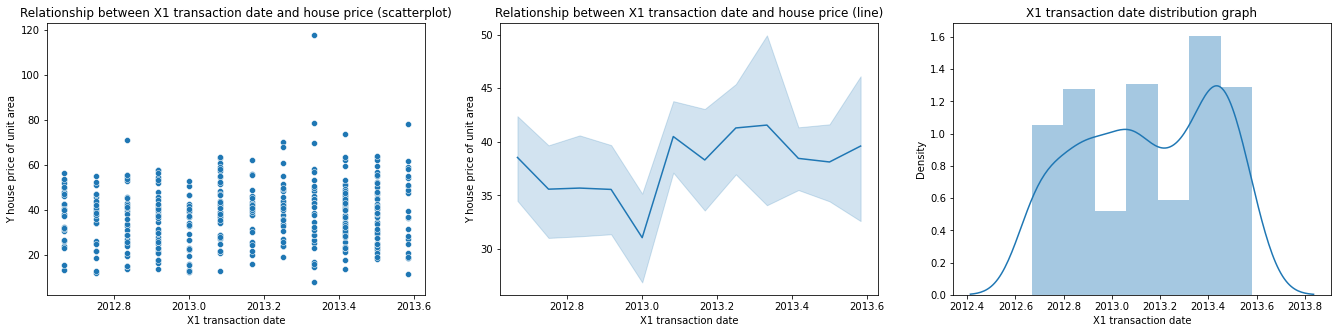

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


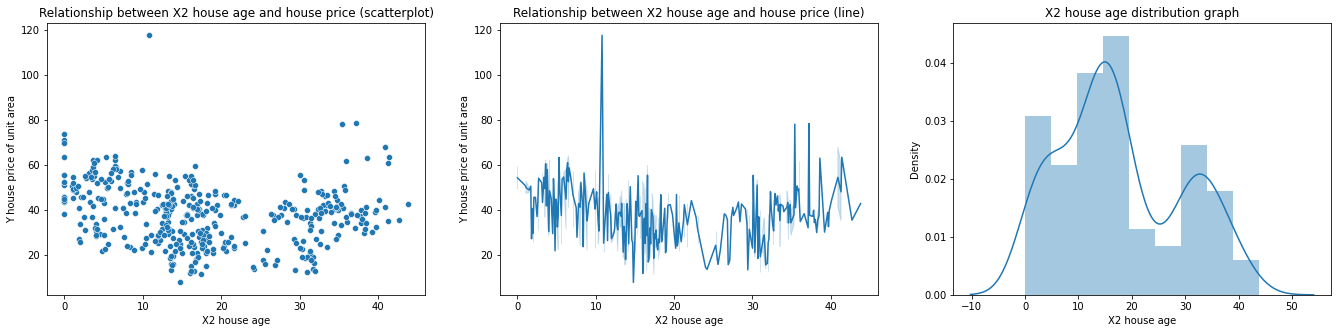

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


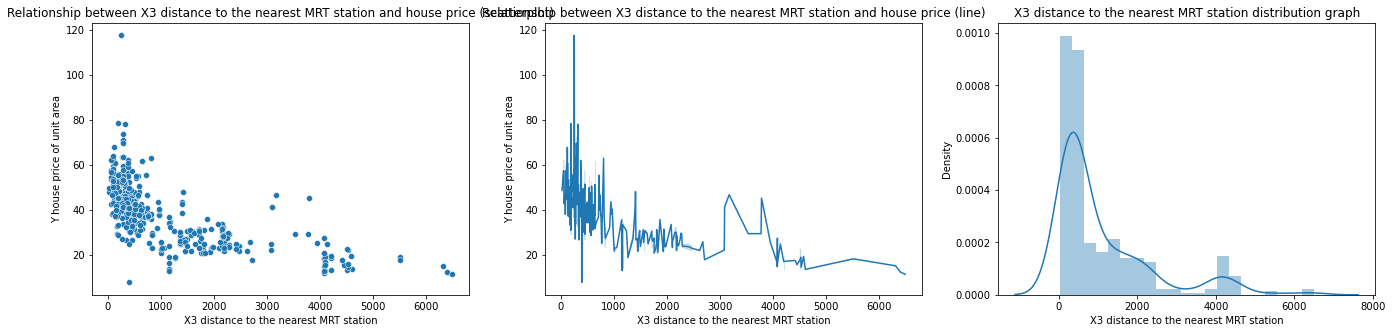

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


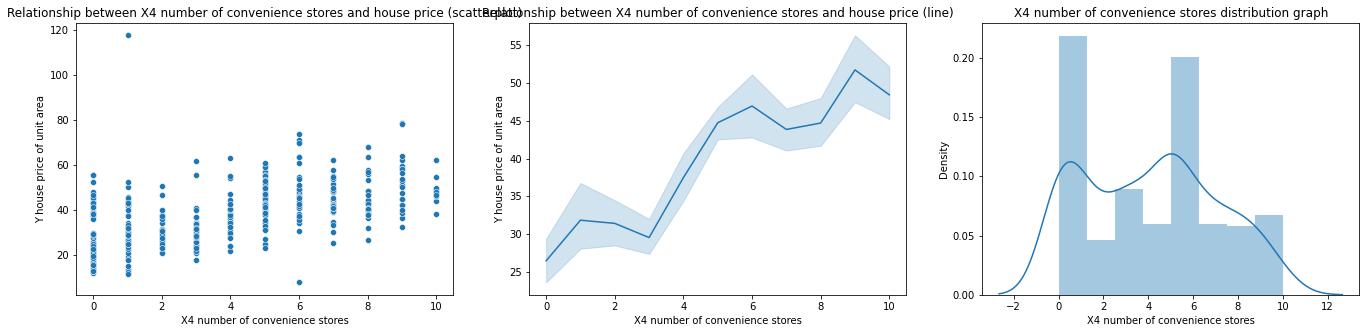

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


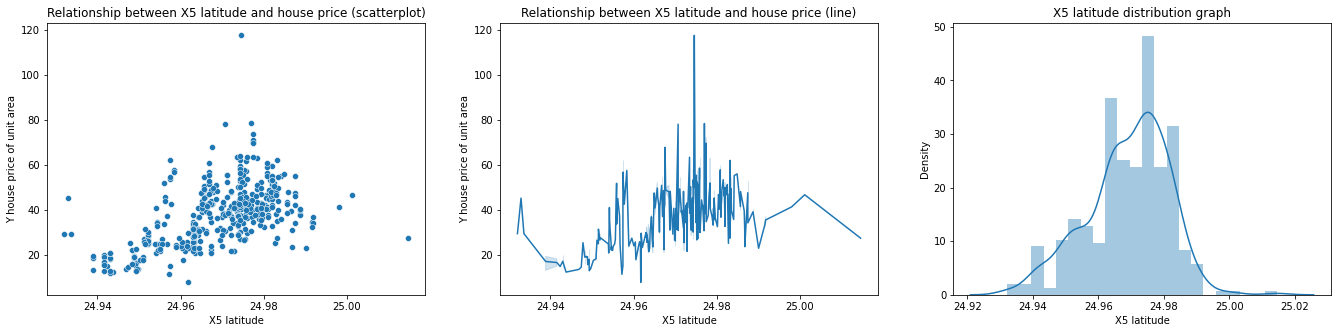

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


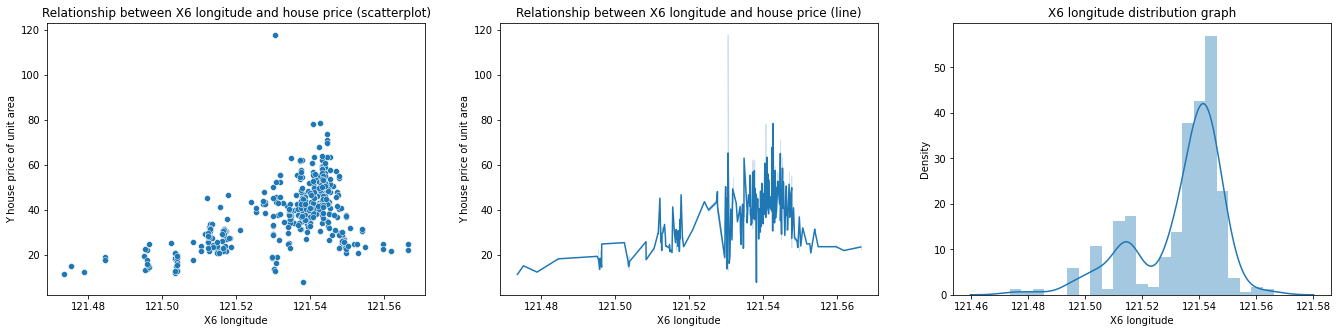

In [68]:
features = [col for col in df.columns if 'X' in col]

for col in features:
    fig, ax = plt.subplots(1, 3, figsize=(23,5))
    plt.title(col)
    sns.scatterplot(data=df, x=col, y='Y house price of unit area', ax=ax[0])
    sns.lineplot(data=df, x=col, y='Y house price of unit area', ax=ax[1])
    sns.distplot(df[col], ax=ax[2])
    ax[0].set_title(f'Relationship between {col} and house price (scatterplot)')
    ax[1].set_title(f'Relationship between {col} and house price (line)')
    ax[2].set_title(f'{col} distribution graph')
    plt.show()

In [99]:
y = df['Y house price of unit area']
X = df.drop('Y house price of unit area', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'X train shape: {X_train.shape}\nX valid shape: {X_valid.shape}\ny train shape: {y_train.shape}\ny valid shape: {y_valid.shape}\n')

X train shape: (331, 6)
X valid shape: (83, 6)
y train shape: (331,)
y valid shape: (83,)



In [102]:
# useful_features = [col for col in features if col!='X2 house age']

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train[features]), columns=features)
X_valid = pd.DataFrame(scaler.fit_transform(X_valid[features]), columns=features)

norm = Normalizer()
X_train = pd.DataFrame(norm.fit_transform(X_train[features]), columns=features)
X_valid = pd.DataFrame(norm.fit_transform(X_valid[features]), columns=features)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


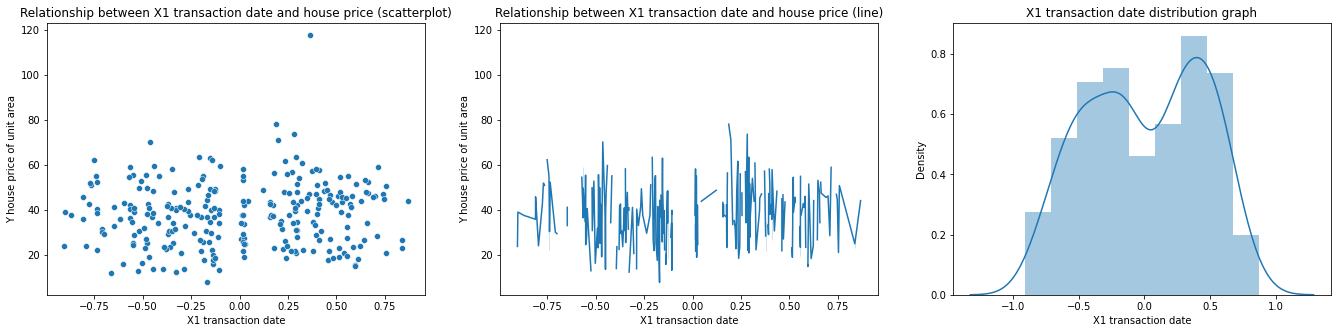

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


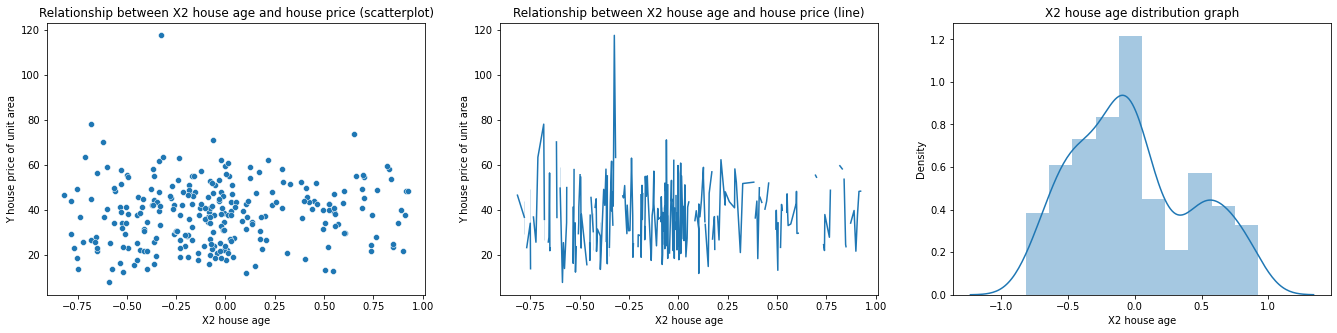

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


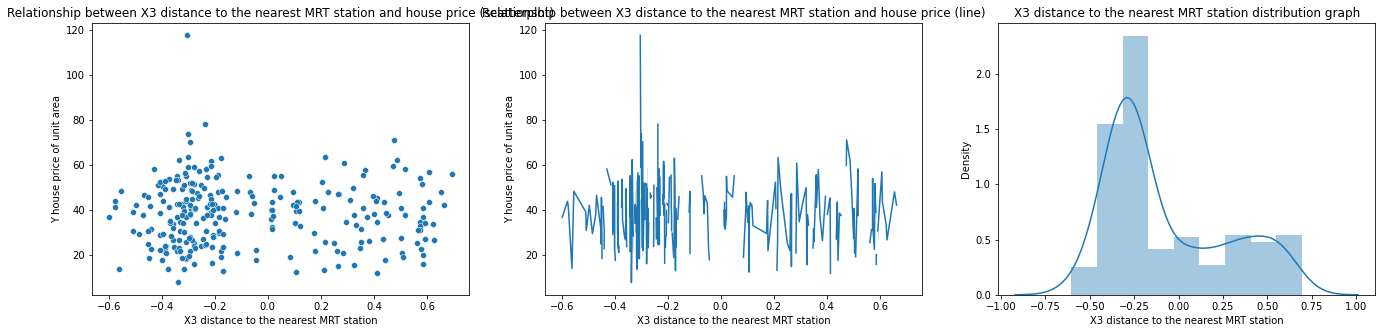

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


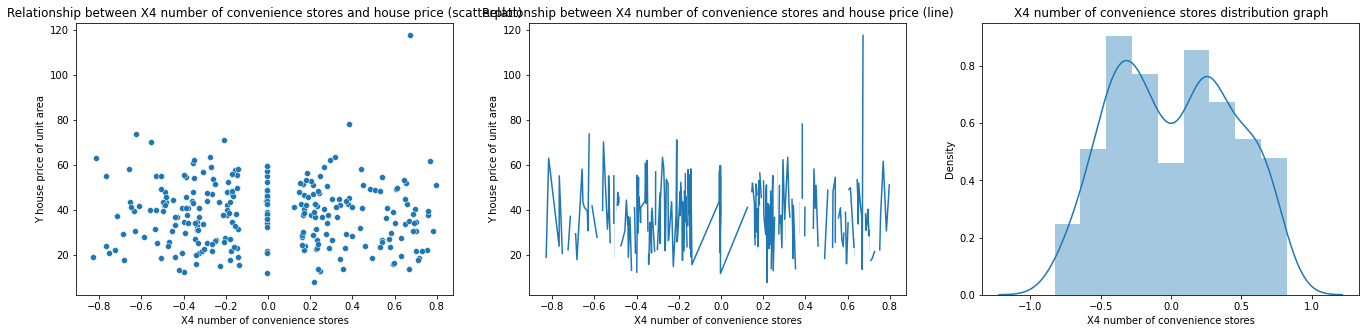

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


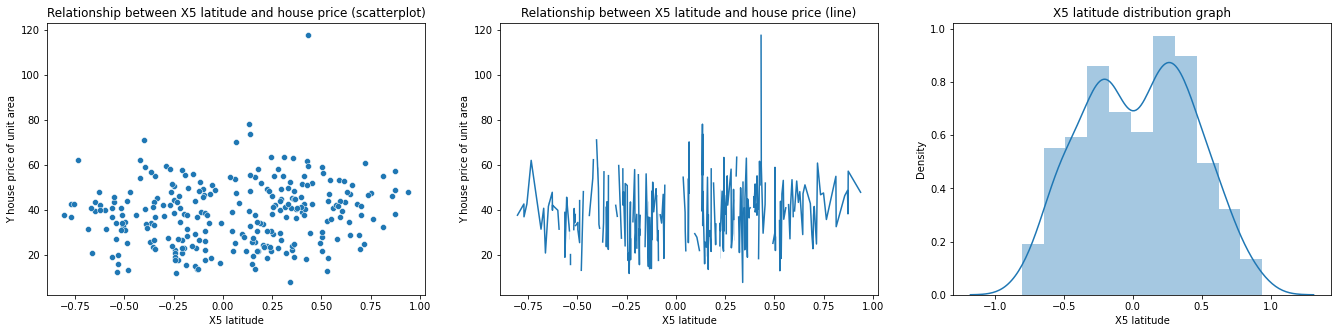

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


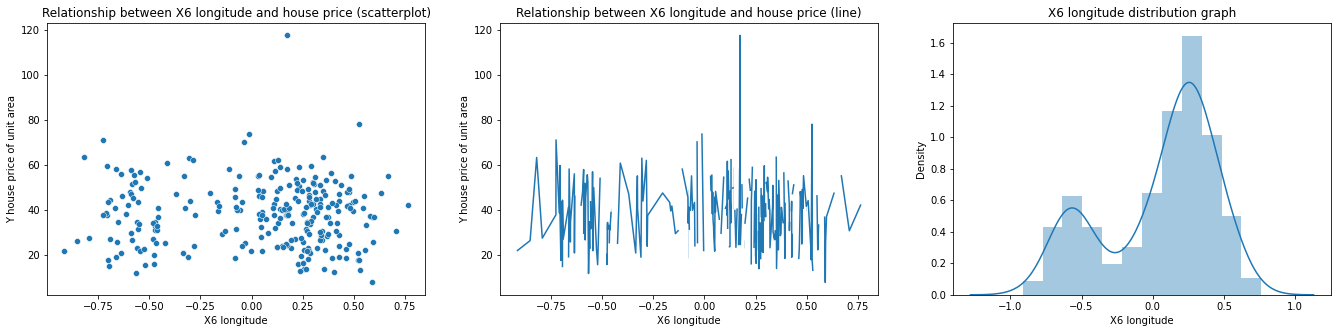

In [104]:
for col in features:
    fig, ax = plt.subplots(1, 3, figsize=(23,5))
    plt.title(col)
    sns.scatterplot(x=X_train[col], y=y_train, ax=ax[0])
    sns.lineplot(x=X_train[col], y=y_train, ax=ax[1])
    sns.distplot(X_train[col], ax=ax[2])
    ax[0].set_title(f'Relationship between {col} and house price (scatterplot)')
    ax[1].set_title(f'Relationship between {col} and house price (line)')
    ax[2].set_title(f'{col} distribution graph')
    plt.show()

In [138]:
class Linear_Regression:
    def __init__(self, lr=0.5, n_iters=500):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            # y = wx + b
            y_predicted = np.dot(X, self.weights) + self.bias
            # 1/N * Σ2X(y^-y)
            # 2 is just for scale, so it is ommitted
            dw = 1/n_samples * np.dot(X.T, (y_predicted-y))
            # 1/N * Σ2(y^-y)
            db = 1/n_samples * np.sum(y_predicted-y)
            
            # update weight
            # w = w - (lr)dw
            # b = b - (lr)db
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        # y = wx + b
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [139]:
lr_model = Linear_Regression()
lr_model.fit(X_train.to_numpy(), y_train)
lr_pred = lr_model.predict(X_valid.to_numpy())
lr_rmse = np.sqrt(mean_squared_error(lr_pred, y_valid))
print(f'Root mean square error (Linear class): {lr_rmse:.2f}')

Root mean square error (Linear class): 7.68


## Linear Regression model from Sklearn 

In [136]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(pred, y_valid))
print(f'Root mean square error (Linear library from sklearn): {rmse:.2f}')

Root mean square error (Linear library from sklearn): 7.68
